<a href="https://colab.research.google.com/github/rehgend/EksplorasiHyperparameterCNN_NN/blob/main/Tugas%201A%20-%20Klasifikasi%20pada%20Dataset%20CIFAR10%20dengan%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Tugas 1A - Klasifikasi pada Dataset CIFAR10 dengan CNN**
### **<center>Rahman Indra Kesuma - 33221026**
<br><br>


## **Tahapan 1.**
Memuat library yang dibutuhkan dalam pemrosesan data hingga proses pembelajaran pada Dataset CIFAR10 dengan menggunakan algoritma Convolutional Neural Network.

In [1]:
# Library yang digunakan untuk pengolahan data dan load data
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Library yang digunakan untuk membuat model dengan arsitektur CNN
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten

# Library yang digunakan untuk pemilihan optimizer yang digunakan
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Nadam

# Library yang digunakan untuk pembuatan Learning Rate Scheduler
from tensorflow.keras.callbacks import LearningRateScheduler

# Library yang digunakan untuk memuat model terbaik yang disimpan
from keras import models

# Library untuk mengunggah file ke folder google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## **Tahapan 2.**
Memuat dataset CIFAR10 dari Keras Built-In Small Dataset sekaligus menampilkan beberapa sample dari data training yang telah berhasil dimuat.

In [2]:
# Memuat dataset dataset yang akan dilakukan Classification Learning
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (remaining_images, remaining_labels) = cifar10.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
remaining_images = (np.expand_dims(remaining_images, axis=-1)/255.).astype(np.float32)
remaining_labels = (remaining_labels).astype(np.int64)

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# Melakukan pembagian dari data testing menjadi dua kelompok data, yaitu validation data dan testing data
valid_images, test_images, valid_labels, test_labels = train_test_split(remaining_images, remaining_labels, test_size=0.5)

print("Ukuran Training Data -> ", train_images.shape)
print("Ukuran Validation Data -> ", valid_images.shape)
print("Ukuran Testing Data -> ", test_images.shape)

Ukuran Training Data ->  (50000, 32, 32, 3, 1)
Ukuran Validation Data ->  (5000, 32, 32, 3, 1)
Ukuran Testing Data ->  (5000, 32, 32, 3, 1)


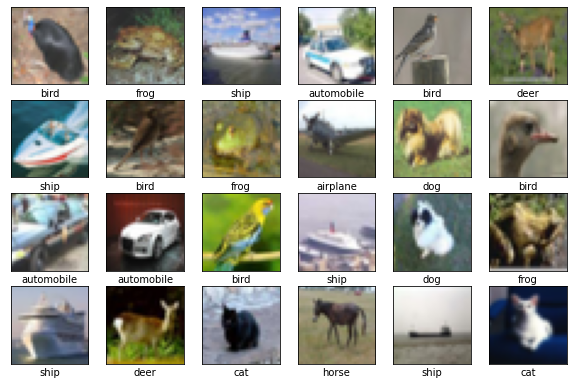

In [4]:
# Proses untuk menampilkan sample dari 50000 data training yang ada yang dipilih secara random 24 gambar
label_gambar = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
random_inds = np.random.choice(50000,24)
for i in range(24):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(label_gambar[train_labels[image_ind][0]])

## **Tahapan 3**.
Pendefinisian fungsi untuk membentuk arsitektur CNN dengan parameter yang berubah yaitu:
1.   Jumlah Convolutional Layer (*NumConvLayer*)
2.   Ukuran Filter (*FilterSize*)
3.   Jumlah Filter (*NumFilter*)
4.   Banyaknya hidden unit pada Fully-Connected Layer (*NumHiddenUnit*)



In [5]:
def build_cnn_model(NumConvLayer, FilterSize, NumFilter, NumHiddenUnit):
  cnn_model = Sequential()
  
  cnn_model.add(Conv2D(filters=NumFilter, kernel_size=(FilterSize,FilterSize), activation=tf.nn.relu, input_shape=(32, 32, 3)))
  cnn_model.add(MaxPool2D(pool_size=(2,2)))
  
  for i in range(0, NumConvLayer-1):
    NumFilter = NumFilter * 2
    cnn_model.add(Conv2D(filters=NumFilter, kernel_size=(FilterSize,FilterSize), activation=tf.nn.relu))
    cnn_model.add(MaxPool2D(pool_size=(2,2)))
  
  cnn_model.add(Flatten())
  cnn_model.add(Dense(NumHiddenUnit, activation=tf.nn.relu))
  cnn_model.add(Dense(10, activation='softmax'))
  
  return cnn_model

## **Tahapan 4.**
Percobaan untuk melakukan pencarian ukuran filter (FilterSize) yang terbaik

In [ ]:
#Definisi Awal NumConvLayer=1
#Definisi Awal FilterSize=3
#Definisi Awal NumFilter=32
#Definisi Awal NumHiddenUnit=128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
for FilterSizeFind in range(1, 10, 2):
  model_percobaan1 = build_cnn_model(1,FilterSizeFind,32,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan1.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan1.summary()
  model_percobaan1.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan1.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        128       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               1048704   
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,050,122
Trainable params: 1,050,122
Non-trainable params: 0
____________________________________________

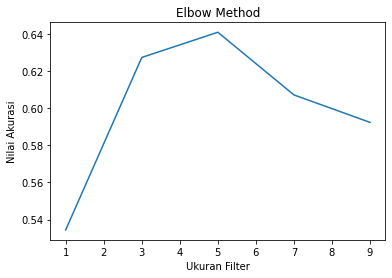

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Ukuran Filter
plt.plot(range(1, 10, 2), validation_acc)
plt.title('Elbow Method')
plt.xlabel('Ukuran Filter')
plt.ylabel('Nilai Akurasi')
plt.show()

## **Tahapan 5.**
Percobaan untuk melakukan pencarian jumlah filter (NumFilter) yang terbaik

In [ ]:
#Definisi Awal NumConvLayer = 1
#Nilai Terbaik FilterSize = 5
#Pencarian nilai NumFilter = 8, 16, 32, 64, 128
#Definisi Awal NumHiddenUnit = 128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
NumFilterFind = 8
for NumFilterTry in range(1, 6):
  model_percobaan2 = build_cnn_model(1,5,NumFilterFind,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan2.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan2.summary()
  model_percobaan2.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan2.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)
  NumFilterFind = NumFilterFind * 2

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1568)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               200832    
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 202,730
Trainable params: 202,730
Non-trainable params: 0
_______________________________________________

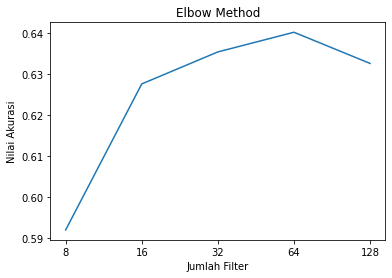

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Filter
plt.plot(['8','16','32','64','128'], validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Filter')
plt.ylabel('Nilai Akurasi')
plt.show()

## **Tahapan 6.**
Percobaan untuk melakukan pencarian jumlah convolutional layer (NumConvLayer) yang terbaik, dengan pertimbangan nilai Ukuran Filter 5x5 dan Jumlah Filter sebanyak 32.

In [ ]:
#Pencarian Nilai NumConvLayer = 1, 2, 3, 4, 5 (Namun nilai jumlah conv layer 3, 4, dan 5 tidak bisa dilakukan karena ukuran dimensi gambar yang sudah sangat kecil)
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik(1) NumFilter = 32
#Definisi Awal NumHiddenUnit = 128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
for NumConvLayerFind in range(1, 3):
  model_percobaan3 = build_cnn_model(NumConvLayerFind,5,32,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan3.summary()
  model_percobaan3.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan3.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               802944    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 806,666
Trainable params: 806,666
Non-trainable params: 0
________________________________________________

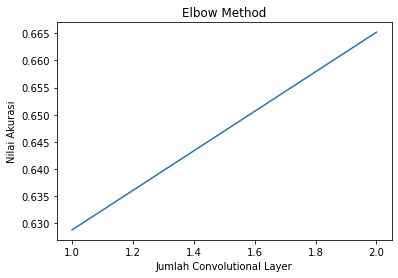

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Convolutional Layer
# dengan Nilai Jumlah Filter 32
plt.plot(range(1, 3), validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Convolutional Layer')
plt.ylabel('Nilai Akurasi')
plt.show()

## **Tahapan 7.**
Percobaan untuk melakukan pencarian jumlah convolutional layer (NumConvLayer) yang terbaik, dengan pertimbangan nilai Ukuran Filter 5x5 dan Jumlah Filter sebanyak 64.

In [ ]:
#Pencarian Nilai NumConvLayer = 1, 2, 3, 4, 5 (Namun nilai jumlah conv layer 3, 4, dan 5 tidak bisa dilakukan karena ukuran dimensi gambar yang sudah sangat kecil)
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik(2) NumFilter = 64
#Definisi Awal NumHiddenUnit = 128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
for NumConvLayerFind in range(1, 3):
  model_percobaan4 = build_cnn_model(NumConvLayerFind,5,64,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan4.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan4.summary()
  model_percobaan4.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan4.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 12544)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               1605760   
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,611,914
Trainable params: 1,611,914
Non-trainable params: 0
___________________________________________

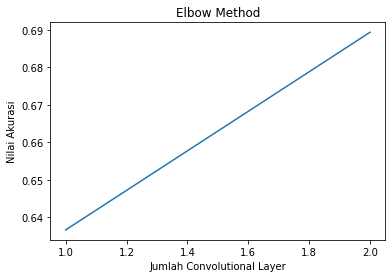

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Convolutional Layer
# dengan Nilai Jumlah Filter 64
plt.plot(range(1, 3), validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Convolutional Layer')
plt.ylabel('Nilai Akurasi')
plt.show()

## **Tahapan 8.**
Percobaan untuk melakukan pencarian jumlah convolutional layer (NumConvLayer) yang terbaik, dengan pertimbangan nilai Ukuran Filter 5x5 dan Jumlah Filter sebanyak 128.

In [ ]:
#Pencarian Nilai NumConvLayer = 1, 2, 3, 4, 5 (Namun nilai jumlah conv layer 3, 4, dan 5 tidak bisa dilakukan karena ukuran dimensi gambar yang sudah sangat kecil)
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik(3) NumFilter = 128
#Definisi Awal NumHiddenUnit = 128

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
for NumConvLayerFind in range(1, 3):
  model_percobaan5 = build_cnn_model(NumConvLayerFind,5,128,128)
  opt = Adam(learning_rate=0.001)
  model_percobaan5.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  model_percobaan5.summary()
  model_percobaan5.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
  loss_val, acc_val = model_percobaan5.evaluate(valid_images, valid_labels)
  validation_loss.append(loss_val)
  validation_acc.append(acc_val)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 25088)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               3211392   
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,222,410
Trainable params: 3,222,410
Non-trainable params: 0
___________________________________________

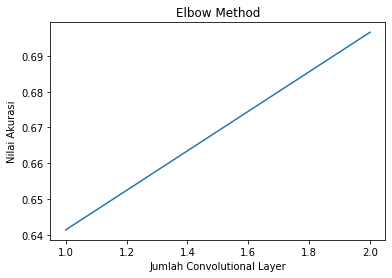

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Convolutional Layer
# dengan Nilai Jumlah Filter 128
plt.plot(range(1, 3), validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Convolutional Layer')
plt.ylabel('Nilai Akurasi')
plt.show()

## **Tahapan 9.**
Percobaan untuk melakukan pencarian jumlah neuron pada hidden layer (NumHiddenUnit) yang terbaik, dengan pertimbangan nilai Ukuran Filter 5x5, Jumlah Filter sebanyak 128 dan Banyaknya Convolutional Layer adalah 2.

In [ ]:
#Nilai Terbaik NumConvLayer = 2
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik NumFilter = 128
#Pencarian Nilai NumHiddenUnit = 32, 64, 128, 256, 512

BATCH_SIZE = 64
EPOCHS = 5

validation_loss = []
validation_acc = []
NumHiddenUnitFind = 32

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
NumHiddenUnitFind = 64

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
NumHiddenUnitFind = 128

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
NumHiddenUnitFind = 256

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [ ]:
NumHiddenUnitFind = 512

model_percobaan6 = build_cnn_model(2,5,128,NumHiddenUnitFind)
opt = Adam(learning_rate=0.001)
model_percobaan6.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan6.summary()
model_percobaan6.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
loss_val, acc_val = model_percobaan6.evaluate(valid_images, valid_labels)
validation_loss.append(loss_val)
validation_acc.append(acc_val)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dense_8 (Dense)             (None, 512)              

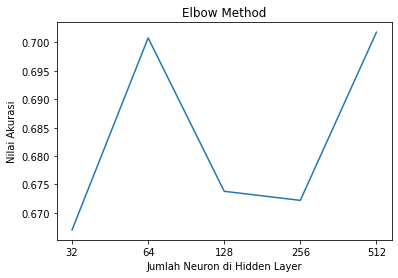

In [ ]:
# Menampilkan hasil perhitungan validation accuracy pada setiap percobaan nilai Jumlah Neuron pada Hidden Layer
plt.plot(['32','64','128','256','512'], validation_acc)
plt.title('Elbow Method')
plt.xlabel('Jumlah Neuron di Hidden Layer')
plt.ylabel('Nilai Akurasi')
plt.show()

## **Tahapan 10.**
Percobaan untuk melakukan pencarian Jenis Optimizer yang terbaik dari lima pilihan optimizer yang didefinisikan (RMSprop, Adam, Adadelta, Adagrad, dan SGD+Momentum), dengan pertimbangan nilai Ukuran Filter 5x5, Jumlah Filter sebanyak 128, Banyaknya Convolutional Layer adalah 2 (128 dan 256 NumFilter), dan 512 Neuron di Hidden Layer.

In [ ]:
#Nilai Terbaik NumConvLayer = 2
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik NumFilter = 128 pada Conv1 dan 256 pada Conv2
#Pencarian Nilai NumHiddenUnit = 512

BATCH_SIZE = 64
EPOCHS = 5
opt = RMSprop(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_rmsprop_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 512)               3

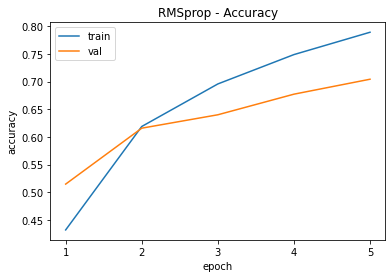

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer RMSprop
plt.plot(['1','2','3','4','5'], history_rmsprop_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_rmsprop_training.history['val_accuracy'])
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Adadelta(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_adadelta_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

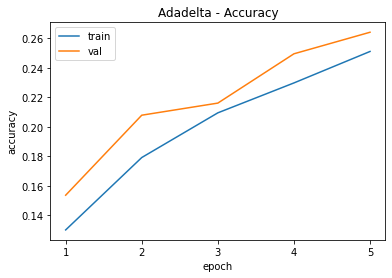

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Adadelta
plt.plot(['1','2','3','4','5'], history_adadelta_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_adadelta_training.history['val_accuracy'])
plt.title('Adadelta - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Adagrad(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_adagrad_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 512)              

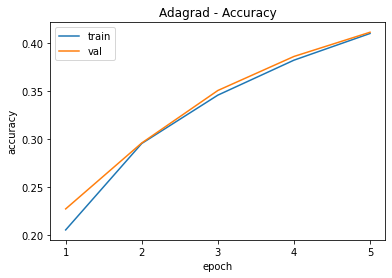

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Adagrad
plt.plot(['1','2','3','4','5'], history_adagrad_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_adagrad_training.history['val_accuracy'])
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = SGD(learning_rate=0.001, momentum=0.5)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_sgd_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dense_8 (Dense)             (None, 512)              

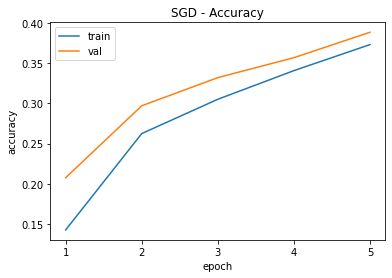

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer SQD+Momentum
plt.plot(['1','2','3','4','5'], history_sgd_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_sgd_training.history['val_accuracy'])
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Adam(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_adam_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 256)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 6400)              0         
                                                                 
 dense_10 (Dense)            (None, 512)              

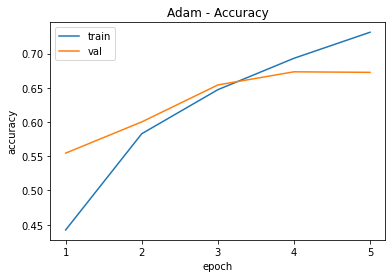

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Adam
plt.plot(['1','2','3','4','5'], history_adam_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_adam_training.history['val_accuracy'])
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Adamax(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_adamax_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 256)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 6400)              0         
                                                                 
 dense_12 (Dense)            (None, 512)              

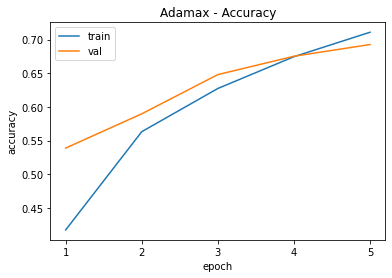

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Adamax
plt.plot(['1','2','3','4','5'], history_adamax_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_adamax_training.history['val_accuracy'])
plt.title('Adamax - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adamax-Accuracy.jpg')
plt.show()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = Nadam(learning_rate=0.001)

model_percobaan7 = build_cnn_model(2,5,128,512)
model_percobaan7.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_percobaan7.summary()
history_nadam_training = model_percobaan7.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 256)       819456    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 256)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 6400)              0         
                                                                 
 dense_14 (Dense)            (None, 512)              

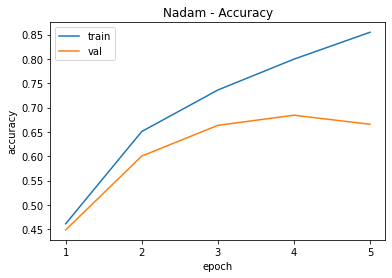

In [ ]:
# Ploting Hasil Penggunaan dari Optimizer Nadam
plt.plot(['1','2','3','4','5'], history_nadam_training.history['accuracy'])
plt.plot(['1','2','3','4','5'], history_nadam_training.history['val_accuracy'])
plt.title('Nadam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Nadam-Accuracy.jpg')
plt.show()

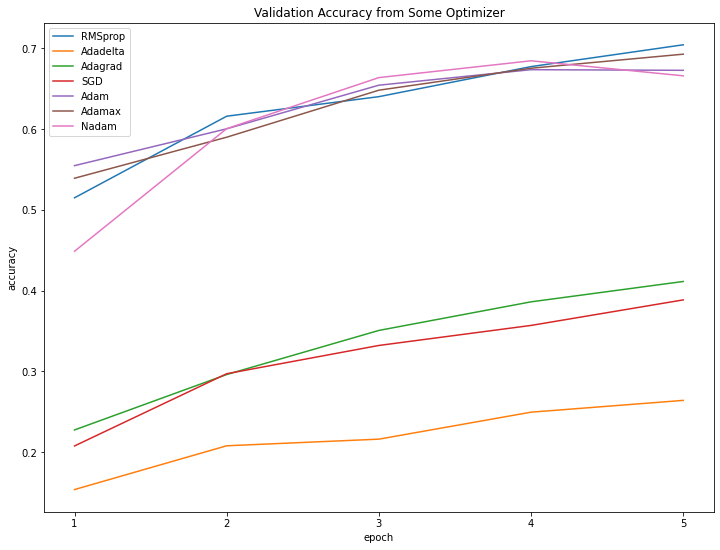

In [ ]:
# Ploting Hasil Eksplorasi dari Penerapan Beberapa Optimizer Terhadap Akurasi pada Validation Data
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.plot(['1','2','3','4','5'], history_rmsprop_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_adadelta_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_adagrad_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_sgd_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_adam_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_adamax_training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], history_nadam_training.history['val_accuracy'])
plt.title('Validation Accuracy from Some Optimizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop', 'Adadelta', 'Adagrad', 'SGD', 'Adam', 'Adamax', 'Nadam'])
plt.savefig('Val-Accuracy-All-Optimizer.jpg')
plt.show()

## **Tahapan 11.**
Percobaan untuk melakukan pencarian Jenis Loss Functions yang terbaik dari lima pilihan Losses yang didefinisikan (binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy, poisson, dan kl_divergence), dengan pertimbangan nilai Ukuran Filter 5x5, Jumlah Filter sebanyak 128, Banyaknya Convolutional Layer adalah 2 (128 dan 256 NumFilter), 512 Neuron di Hidden Layer, dan RMSprop Optimizer.

In [ ]:
# Pemrosesan mengubah data label dari fitur kategorikal menjadi One-Hot Numeric Array 
# untuk digunakan pada Loss Function yang membutuhkan pemrosesan dengan One-Hot Numeric Array

encoder_label = OneHotEncoder(sparse=False)
model_label = encoder_label.fit(train_labels)

onehot_train_label = pd.DataFrame(model_label.transform(train_labels))
onehot_valid_label = pd.DataFrame(model_label.transform(valid_labels))

print(onehot_train_label)

         0    1    2    3    4    5    6    7    8    9
0      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
49995  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
49996  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
49997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
49998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
49999  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[50000 rows x 10 columns]


Epoch 1/5
782/782 [==============================] - 721s 921ms/step - loss: 0.2575 - accuracy: 0.4090 - val_loss: 0.2217 - val_accuracy: 0.5070
Epoch 2/5
782/782 [==============================] - 710s 908ms/step - loss: 0.1819 - accuracy: 0.6067 - val_loss: 0.2000 - val_accuracy: 0.5694
Epoch 3/5
782/782 [==============================] - 707s 904ms/step - loss: 0.1488 - accuracy: 0.6893 - val_loss: 0.1828 - val_accuracy: 0.6198
Epoch 4/5
782/782 [==============================] - 704s 900ms/step - loss: 0.1260 - accuracy: 0.7470 - val_loss: 0.1584 - val_accuracy: 0.6934
Epoch 5/5
782/782 [==============================] - 823s 1s/step - loss: 0.1088 - accuracy: 0.7897 - val_loss: 0.1537 - val_accuracy: 0.7102


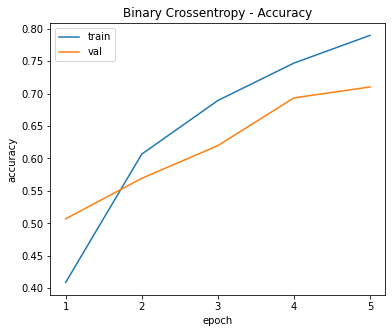

In [ ]:
#Nilai Terbaik NumConvLayer = 2
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik NumFilter = 128 pada Conv1 dan 256 pada Conv2
#Pencarian Nilai NumHiddenUnit = 512

BATCH_SIZE = 64
EPOCHS = 5
opt = RMSprop(learning_rate=0.001)

model_percobaan8 = build_cnn_model(2,5,128,512)
model_percobaan8.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
History_BinaryCE_Training = model_percobaan8.fit(train_images, onehot_train_label, validation_data=(valid_images, onehot_valid_label), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Penggunaan dari Binary Crossentropy Loss Function
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(['1','2','3','4','5'], History_BinaryCE_Training.history['accuracy'])
plt.plot(['1','2','3','4','5'], History_BinaryCE_Training.history['val_accuracy'])
plt.title('Binary Crossentropy - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('BinaryCrossentropy-Accuracy.jpg')
plt.show()

Epoch 1/5
782/782 [==============================] - 719s 919ms/step - loss: 1.6297 - accuracy: 0.4290 - val_loss: 1.2990 - val_accuracy: 0.5514
Epoch 2/5
782/782 [==============================] - 699s 894ms/step - loss: 1.1112 - accuracy: 0.6175 - val_loss: 1.2368 - val_accuracy: 0.5990
Epoch 3/5
782/782 [==============================] - 701s 896ms/step - loss: 0.8918 - accuracy: 0.6965 - val_loss: 1.0358 - val_accuracy: 0.6544
Epoch 4/5
782/782 [==============================] - 693s 886ms/step - loss: 0.7454 - accuracy: 0.7476 - val_loss: 1.0107 - val_accuracy: 0.6582
Epoch 5/5
782/782 [==============================] - 691s 884ms/step - loss: 0.6214 - accuracy: 0.7902 - val_loss: 1.9517 - val_accuracy: 0.5342


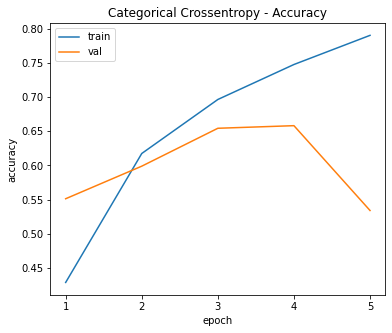

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = RMSprop(learning_rate=0.001)

model_percobaan8 = build_cnn_model(2,5,128,512)
model_percobaan8.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
History_CategoricalCE_Training = model_percobaan8.fit(train_images, onehot_train_label, validation_data=(valid_images, onehot_valid_label), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Penggunaan dari Categorical Crossentropy Loss Function
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(['1','2','3','4','5'], History_CategoricalCE_Training.history['accuracy'])
plt.plot(['1','2','3','4','5'], History_CategoricalCE_Training.history['val_accuracy'])
plt.title('Categorical Crossentropy - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('CategoricalCrossentropy-Accuracy.jpg')
plt.show()

Epoch 1/5
782/782 [==============================] - 812s 1s/step - loss: 0.2627 - accuracy: 0.4236 - val_loss: 0.2653 - val_accuracy: 0.4342
Epoch 2/5
782/782 [==============================] - 791s 1s/step - loss: 0.2118 - accuracy: 0.6133 - val_loss: 0.2389 - val_accuracy: 0.5620
Epoch 3/5
782/782 [==============================] - 880s 1s/step - loss: 0.1904 - accuracy: 0.6896 - val_loss: 0.2173 - val_accuracy: 0.6434
Epoch 4/5
782/782 [==============================] - 857s 1s/step - loss: 0.1758 - accuracy: 0.7430 - val_loss: 0.2065 - val_accuracy: 0.6328
Epoch 5/5
782/782 [==============================] - 778s 994ms/step - loss: 0.1635 - accuracy: 0.7851 - val_loss: 0.2186 - val_accuracy: 0.6316


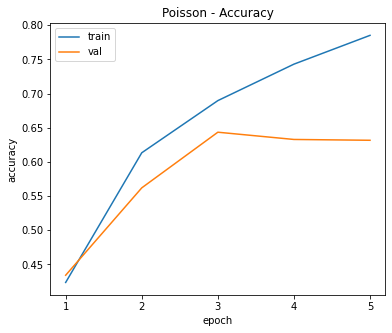

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = RMSprop(learning_rate=0.001)

model_percobaan8 = build_cnn_model(2,5,128,512)
model_percobaan8.compile(optimizer=opt, loss='poisson', metrics=['accuracy'])
History_Poisson_Training = model_percobaan8.fit(train_images, onehot_train_label, validation_data=(valid_images, onehot_valid_label), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Penggunaan dari Poisson Loss Function
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(['1','2','3','4','5'], History_Poisson_Training.history['accuracy'])
plt.plot(['1','2','3','4','5'], History_Poisson_Training.history['val_accuracy'])
plt.title('Poisson - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Poisson-Accuracy.jpg')
plt.show()

Epoch 1/5
782/782 [==============================] - 816s 1s/step - loss: 1.6228 - accuracy: 0.4256 - val_loss: 1.5762 - val_accuracy: 0.4774
Epoch 2/5
782/782 [==============================] - 813s 1s/step - loss: 1.1174 - accuracy: 0.6145 - val_loss: 1.1888 - val_accuracy: 0.6010
Epoch 3/5
782/782 [==============================] - 797s 1s/step - loss: 0.9013 - accuracy: 0.6924 - val_loss: 1.2189 - val_accuracy: 0.5990
Epoch 4/5
782/782 [==============================] - 811s 1s/step - loss: 0.7474 - accuracy: 0.7457 - val_loss: 1.1128 - val_accuracy: 0.6712
Epoch 5/5
782/782 [==============================] - 890s 1s/step - loss: 0.6200 - accuracy: 0.7906 - val_loss: 1.0560 - val_accuracy: 0.6958


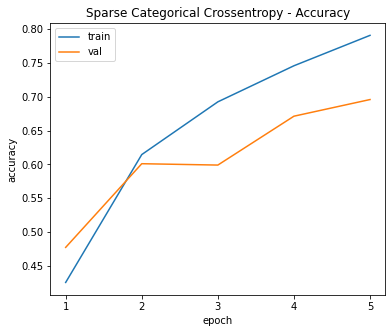

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = RMSprop(learning_rate=0.001)

model_percobaan8 = build_cnn_model(2,5,128,512)
model_percobaan8.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
History_SparceCategoricalCE_Training = model_percobaan8.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Penggunaan dari Sparse Categorical Crossentropy Function
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(['1','2','3','4','5'], History_SparceCategoricalCE_Training.history['accuracy'])
plt.plot(['1','2','3','4','5'], History_SparceCategoricalCE_Training.history['val_accuracy'])
plt.title('Sparse Categorical Crossentropy - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SparseCategoricalCrossentropy-Accuracy.jpg')
plt.show()

Epoch 1/5
782/782 [==============================] - 955s 1s/step - loss: 1.6117 - accuracy: 0.4307 - val_loss: 1.6243 - val_accuracy: 0.3928
Epoch 2/5
782/782 [==============================] - 872s 1s/step - loss: 1.1187 - accuracy: 0.6136 - val_loss: 1.1828 - val_accuracy: 0.5844
Epoch 3/5
782/782 [==============================] - 895s 1s/step - loss: 0.8971 - accuracy: 0.6930 - val_loss: 1.0750 - val_accuracy: 0.6314
Epoch 4/5
782/782 [==============================] - 915s 1s/step - loss: 0.7473 - accuracy: 0.7484 - val_loss: 1.6774 - val_accuracy: 0.5842
Epoch 5/5
782/782 [==============================] - 882s 1s/step - loss: 0.6266 - accuracy: 0.7916 - val_loss: 1.0888 - val_accuracy: 0.6848


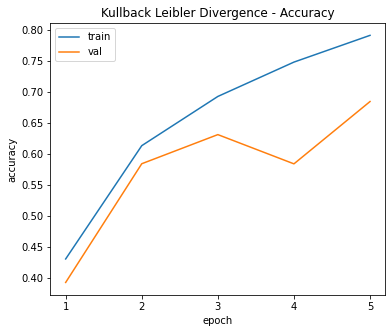

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
opt = RMSprop(learning_rate=0.001)

model_percobaan8 = build_cnn_model(2,5,128,512)
model_percobaan8.compile(optimizer=opt, loss='kl_divergence', metrics=['accuracy'])
History_KLDivergence_Training = model_percobaan8.fit(train_images, onehot_train_label, validation_data=(valid_images, onehot_valid_label), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Penggunaan dari Kullback-Leibler Divergence Function
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(['1','2','3','4','5'], History_KLDivergence_Training.history['accuracy'])
plt.plot(['1','2','3','4','5'], History_KLDivergence_Training.history['val_accuracy'])
plt.title('Kullback Leibler Divergence - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('KullbackLeiblerDivergence-Accuracy.jpg')
plt.show()

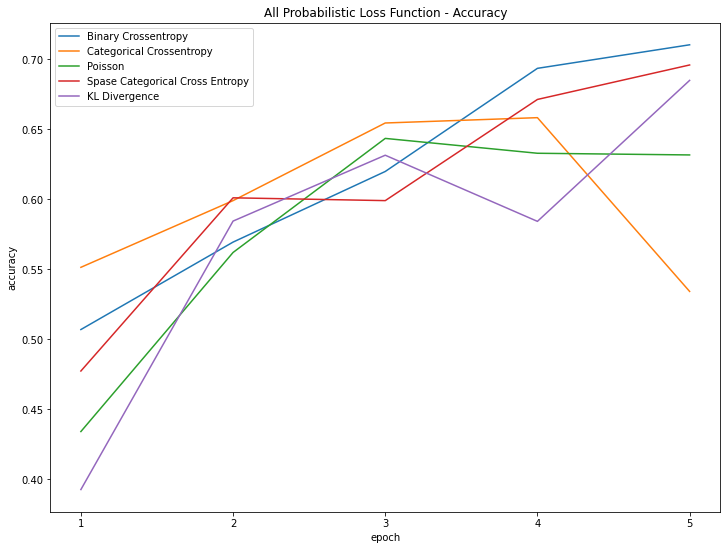

In [ ]:
# Ploting Hasil Penggunaan dari Beberapa Loss Function yang Diamati pada Validation Accuracy
plt.rcParams['figure.figsize'] = (12.0, 9.0)
plt.plot(['1','2','3','4','5'], History_BinaryCE_Training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], History_CategoricalCE_Training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], History_Poisson_Training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], History_SparceCategoricalCE_Training.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], History_KLDivergence_Training.history['val_accuracy'])
plt.title('All Probabilistic Loss Function - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Binary Crossentropy', 'Categorical Crossentropy', 'Poisson', 'Spase Categorical Cross Entropy', 'KL Divergence'])
plt.savefig('AllProbabilisticLossFunction-Accuracy.jpg')
plt.show()

## **Tahapan 12.**
Percobaan untuk melihat pengaruh penggunaan Learning Rate Schedule pada proses learning terhadap model CNN terbaik hasil eksperimen sebelumnya. Pertimbangan desain arsitektur dan proses learning dari eksperimen sebelumnya yaitu (i) nilai Ukuran Filter 5x5, (ii) Jumlah Filter sebanyak 128, (ii) Banyaknya Convolutional Layer adalah 2 (128 Filter pada Conv1 dan 256 Filter pada Conv2), 512 Neuron di Hidden Layer, RMSprop Optimizer, dan Binary Crossentropy Loss Function.

In [24]:
# Pendefinisian beberapa variabel untuk proses penyimpanan model ke Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
# Pemrosesan mengubah data label dari fitur kategorikal menjadi One-Hot Numeric Array untuk digunakan
# pada Binary Crossentropy Loss Function yang membutuhkan pemrosesan dengan One-Hot Numeric Array

encoder_label = OneHotEncoder(sparse=False)
model_label = encoder_label.fit(train_labels)

onehot_train_label = pd.DataFrame(model_label.transform(train_labels))
onehot_valid_label = pd.DataFrame(model_label.transform(valid_labels))

print(onehot_train_label)

         0    1    2    3    4    5    6    7    8    9
0      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
49995  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
49996  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
49997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
49998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
49999  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[50000 rows x 10 columns]


In [8]:
# Pendefinisian class fungsi yang mana pada Learning Rate Scheduler di atur bahwa setiap Epoch-nya
# terjadi penurunan nilai Learning Rate linier dari initial learning rate hingga mendekati 0

class lr_polynomial_decay:
  def __init__(self, epochs=5, initial_learning_rate=0.001, power=1.0):
    # Menyimpan data nilai maksimum epoch, nilai awal learning rate, dan pangkat polinomial
    self.epochs = epochs
    self.initial_learning_rate = initial_learning_rate
    self.power = power
  
  def __call__(self, epoch):
    # Menghitung nilai learning rate baru yang mempertimbangkan penurunan secara polinomial
    decay = (1 - (epoch / float(self.epochs))) ** self.power
    updated_eta = self.initial_learning_rate * decay
    return float(updated_eta)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/5
782/782 [==============================] - 846s 1s/step - loss: 0.2587 - accuracy: 0.4039 - val_loss: 0.2078 - val_accuracy: 0.5384 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0008.
Epoch 2/5
782/782 [==============================] - 766s 979ms/step - loss: 0.1782 - accuracy: 0.6135 - val_loss: 0.2291 - val_accuracy: 0.5162 - lr: 8.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0006.
Epoch 3/5
782/782 [==============================] - 768s 982ms/step - loss: 0.1424 - accuracy: 0.7029 - val_loss: 0.1652 - val_accuracy: 0.6518 - lr: 6.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0004.
Epoch 4/5
782/782 [==============================] - 767s 981ms/step - loss: 0.1151 - accuracy: 0.7700 - val_loss: 0.1523 - val_accuracy: 0.6852 - lr: 4.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.00019999999999999996.
Epoch 5/5
782/782 [

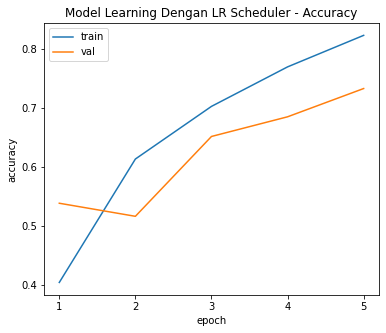

In [9]:
#Nilai Terbaik NumConvLayer = 2
#Nilai Terbaik FilterSize = 5
#Nilai Terbaik NumFilter = 128 pada Conv1 dan 256 pada Conv2
#Pencarian Nilai NumHiddenUnit = 512

BATCH_SIZE = 64
EPOCHS = 5
opt = RMSprop()
curScheduler = lr_polynomial_decay(epochs=EPOCHS, initial_learning_rate=0.001, power=1.0)

model_percobaan9 = build_cnn_model(2,5,128,512)
model_percobaan9.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
History_Training_DenganLRScheduler = model_percobaan9.fit(train_images, onehot_train_label, validation_data=(valid_images, onehot_valid_label), callbacks=[LearningRateScheduler(curScheduler, verbose=1)], batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Learning dengan Penggunaan Learning Rate Scheduler
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(['1','2','3','4','5'], History_Training_DenganLRScheduler.history['accuracy'])
plt.plot(['1','2','3','4','5'], History_Training_DenganLRScheduler.history['val_accuracy'])
plt.title('Model Learning Dengan LR Scheduler - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('ModelLearningDenganLRScheduler-Accuracy.jpg')
plt.show()

In [10]:
# Proses menyimpan model ke Google Drive yang telah disiapkan lokasi foldernya
model_percobaan9.save("Model/CNN_WithLRScheduler.h5")

gfile = drive.CreateFile({'parents': [{'id': '1NnUvsdsWnLmjAzJoHq-k4l_qbgJnWwt3'}], 'title': 'CNN_WithLRScheduler.h5'})
gfile.SetContentFile('Model/CNN_WithLRScheduler.h5')
gfile.Upload()

Epoch 1/5
782/782 [==============================] - 765s 977ms/step - loss: 0.2553 - accuracy: 0.4121 - val_loss: 0.2927 - val_accuracy: 0.4146
Epoch 2/5
782/782 [==============================] - 765s 978ms/step - loss: 0.1801 - accuracy: 0.6103 - val_loss: 0.1829 - val_accuracy: 0.6186
Epoch 3/5
782/782 [==============================] - 776s 992ms/step - loss: 0.1476 - accuracy: 0.6953 - val_loss: 0.2097 - val_accuracy: 0.5686
Epoch 4/5
782/782 [==============================] - 787s 1s/step - loss: 0.1263 - accuracy: 0.7477 - val_loss: 0.1733 - val_accuracy: 0.6392
Epoch 5/5
782/782 [==============================] - 783s 1s/step - loss: 0.1084 - accuracy: 0.7921 - val_loss: 0.1992 - val_accuracy: 0.6774


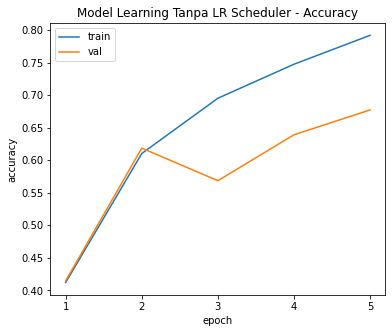

In [11]:
BATCH_SIZE = 64
EPOCHS = 5
opt = RMSprop(learning_rate=0.001)

model_percobaan9 = build_cnn_model(2,5,128,512)
model_percobaan9.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
History_Training_TanpaLRScheduler = model_percobaan9.fit(train_images, onehot_train_label, validation_data=(valid_images, onehot_valid_label), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Learning tanpa Penggunaan Learning Rate Scheduler
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(['1','2','3','4','5'], History_Training_TanpaLRScheduler.history['accuracy'])
plt.plot(['1','2','3','4','5'], History_Training_TanpaLRScheduler.history['val_accuracy'])
plt.title('Model Learning Tanpa LR Scheduler - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('ModelLearningTanpaLRScheduler-Accuracy.jpg')
plt.show()

In [25]:
# Proses menyimpan model ke Google Drive yang telah disiapkan lokasi foldernya
model_percobaan9.save("Model/CNN_WithoutLRScheduler.h5")

gfile = drive.CreateFile({'parents': [{'id': '1NnUvsdsWnLmjAzJoHq-k4l_qbgJnWwt3'}], 'title': 'CNN_WithoutLRScheduler.h5'})
gfile.SetContentFile('Model/CNN_WithoutLRScheduler.h5')
gfile.Upload()

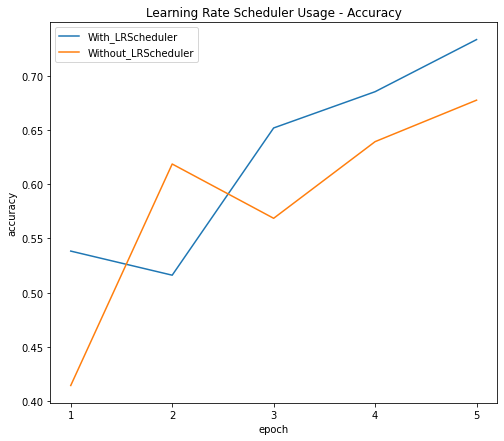

In [26]:
# Ploting Hasil Eksperimen dari Penggunaan Learning Rate Scheduler terhadap Nilai Akurasi pada Data Validasi
plt.rcParams['figure.figsize'] = (8.0, 7.0)
plt.plot(['1','2','3','4','5'], History_Training_DenganLRScheduler.history['val_accuracy'])
plt.plot(['1','2','3','4','5'], History_Training_TanpaLRScheduler.history['val_accuracy'])
plt.title('Learning Rate Scheduler Usage - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['With_LRScheduler', 'Without_LRScheduler'])
plt.savefig('LearningRateSchedulerUsage-Accuracy.jpg')
plt.show()